<a href="https://colab.research.google.com/github/lava99-bliss/Tensorflow/blob/main/02.1_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification problems


1.   Binary Classification
2.   Multiclass Classification
3.   Multilabel Classification



####Create data to view nd fit

In [62]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000
#create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [63]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

[ 0.75424625,  0.23148074] -> 1



> input                      -> output

and also labels ara 1/0. which means this is a binary classification problem.






data is now lil hard to understand, let's visualize it

In [64]:
import pandas as pd
#X0 : all of the data in 0 th axis
circles= pd.DataFrame({"X0" : X[:,0], "X1": X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


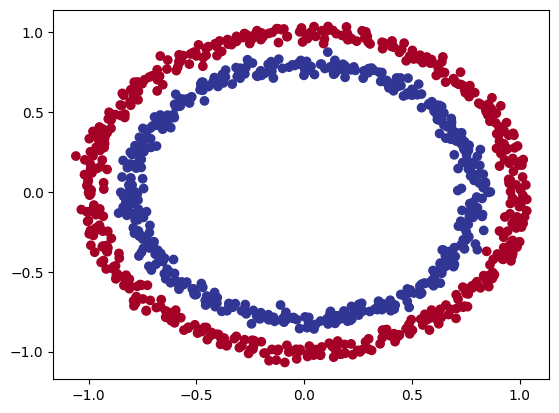

In [65]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

#Input and Output shapes

In [66]:
X.shape, y.shape

((1000, 2), (1000,))

In [67]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#Steps in modelling

In [68]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
 ])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])  #accuracy - percentage of the success

model_1.fit(tf.expand_dims(X,axis=-1),y ,epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.8187 - accuracy: 0.4958
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.2417 - accuracy: 0.4967
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.8683 - accuracy: 0.4975
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.9131 - accuracy: 0.5008
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5005


only 49% accuracy is there.

> What if we add another layer and increse epochs





In [69]:
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
 ])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])  #accuracy - percentage of the success

model_2.fit(tf.expand_dims(X,axis=-1),y ,epochs=200)


Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 7.2621 - accuracy: 0.4880
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [70]:
model_2.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

50% now

##Improve the model

change the optimizer to Adam() and add another layer

In [71]:
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(1)
 ])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])  #accuracy - percentage of the success

model_3.fit(tf.expand_dims(X,axis=-1),y ,epochs=100,verbose=0) #verbose=0 -> no output in rows


In [72]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5056


[0.694284200668335, 0.5055624842643738]

In [73]:
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 2, 100)            200       
                                                                 
 dense_30 (Dense)            (None, 2, 100)            10100     
                                                                 
 dense_31 (Dense)            (None, 2, 1)              101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


##Let's prediction visualization

In [74]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


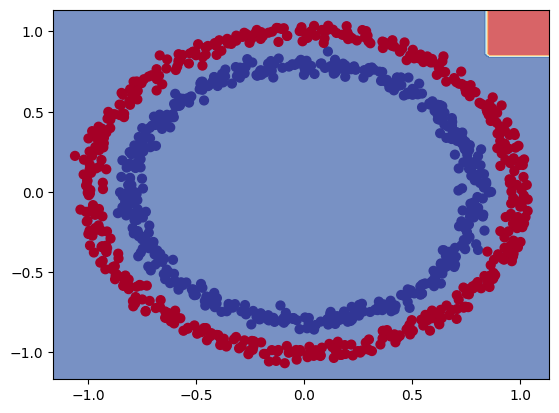

In [75]:
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.



In [76]:

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: -3834.8342 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: -7149.4409 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.
we used loss= binaryCrossentropy


In [77]:
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 274.9272 - mae: 274.9272
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 160.2665 - mae: 160.2665
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 59.8949 - mae: 59.8949
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 71.6524 - mae: 71.6524
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 72.4747 - mae: 72.4747
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.2176 - mae: 47.2176
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.0882 - mae: 46.0882
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.1281 - mae: 42.1281
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.1124 - mae: 43.1124
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.1461 - mae: 42.1461
Epoch 11/100
5/5 [==============================] - 0s 

Okay, it seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.

2/2 [==============================] - 0s 5ms/step


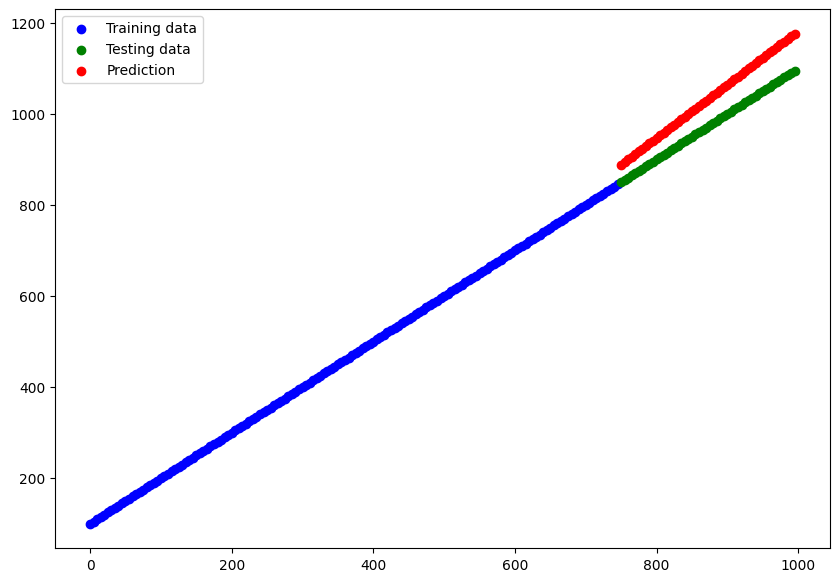

In [78]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Testing data")
plt.scatter(X_reg_test,y_reg_preds.squeeze(),c="r", label="Prediction")
plt.legend()

#The missing piece : Non-Linearity

In [79]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_4.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7177 - accuracy: 0.4951
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6527 - accuracy: 0.4983
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6649 - accuracy: 0.4976
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6439 - accuracy: 0.4995
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6275 - accuracy: 0.4997
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6273 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5824 - accuracy: 0.4993
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5146 - accuracy: 0.4986
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4731 - accuracy: 0.5003
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4201 - accuracy: 0.5008
Epoch 11/

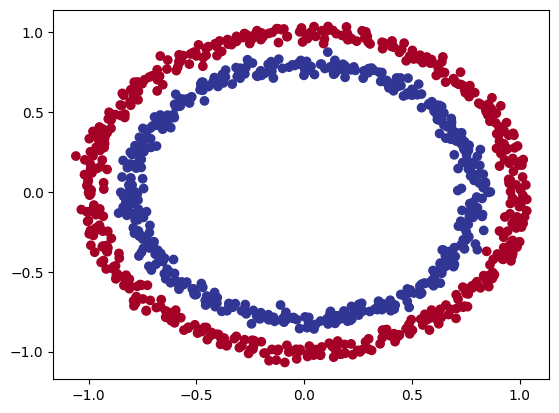

In [80]:
#check out data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)



313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


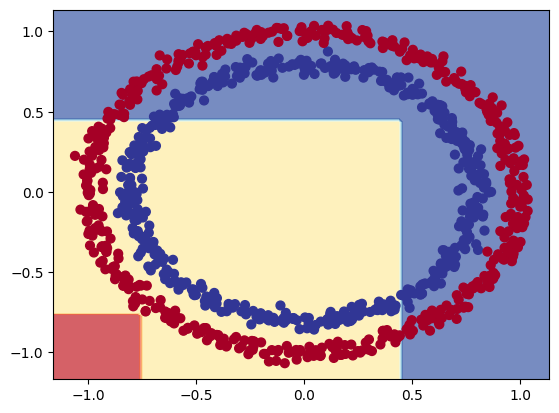

In [81]:
#check decision boundary
plot_decision_boundary(model=model_4,X=X,y=y)


Let's build our first NN with a non-linera actiation

In [82]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss="binary_crossentropy", #losses.BinaryCrossentropy()
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_5.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.6073 - accuracy: 0.5015
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5122 - accuracy: 0.5005
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4178 - accuracy: 0.5008
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4253 - accuracy: 0.4997
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4318 - accuracy: 0.4996
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3856 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3642 - accuracy: 0.4985
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3537 - accuracy: 0.5004
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3521 - accuracy: 0.4983
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3566 - accuracy: 0.4984
Epoch 11/

In [83]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_6.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 3.8529 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3833 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 1.2206 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 1.1312 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 1.0603 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 1.0003 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9495 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9041 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8549 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8051 - accuracy: 0.5000
Epoch 11/

In [84]:
model_6.evaluate(X,)

32/32 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [85]:
#modle prediction v

In [86]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5070
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5270
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5250
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5450
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5170
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5280
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5470
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5480
Epoch 11/

In [87]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.9850


[0.2608409821987152, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


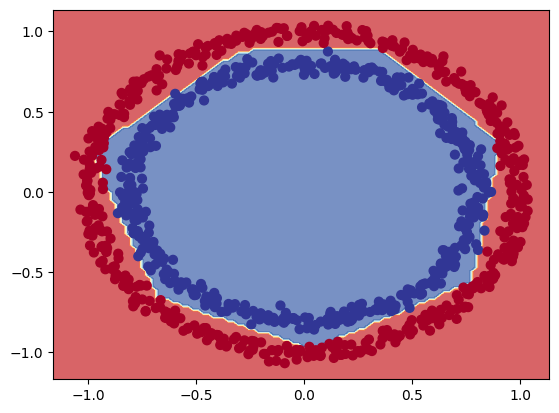

In [88]:
#let's visualize

plot_decision_boundary(model_7,X,y)

In [89]:
#create a toy tensor (data we usually pass in our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

#Straight Line

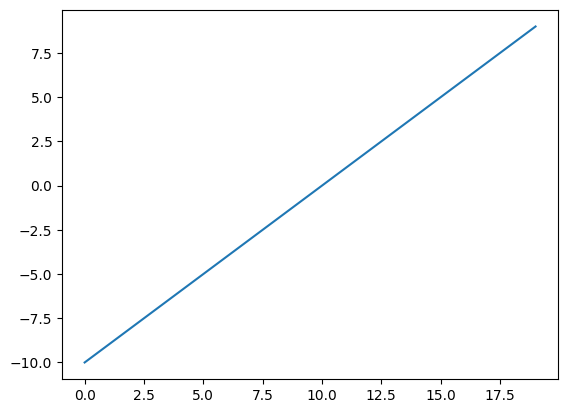

In [90]:
#visualize it
plt.plot(A)

#Non Linear Line

sigmoid

In [91]:
 #let's  start by replication sigmoid (x) = 1/1+exp(-x)

 def sigmoid(x):
  return 1/ (1+ tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

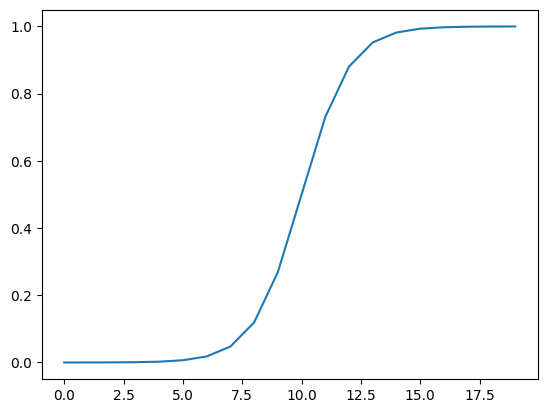

In [92]:
plt.plot(sigmoid(A))

relu

In [93]:
def relu(x):
  return tf.maximum(0,x) #return  max between 0 and x -then all will be positives

  relu(A)

In [94]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [95]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

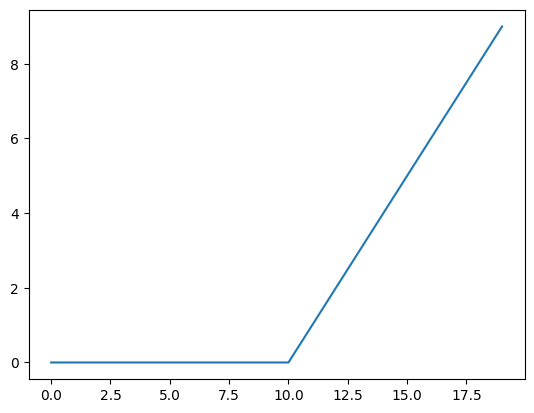

In [96]:
plt.plot(relu(A))

In [97]:
#let's try linear activation functioins
tf.keras.activations.linear(A) # x=y

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

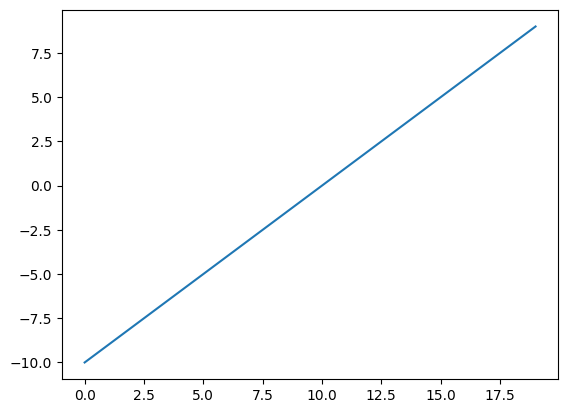

In [98]:
plt.plot(tf.keras.activations.linear(A))

In [99]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

###evaluating and improving our classification

In [100]:
len(X), X.shape

(1000, (1000, 2))

In [101]:
X_train,y_train = X[:800] , y[:800]
X_test,y_test = X[200:] , y[200:]

In [102]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001
                                                     ),
                metrics=["accuracy"])

history = model_8.fit(X_train,y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6958 - accuracy: 0.4963
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5013
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5038
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5375
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5675
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5575
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5537
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5437
Epoch 11/25
25/25 [

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


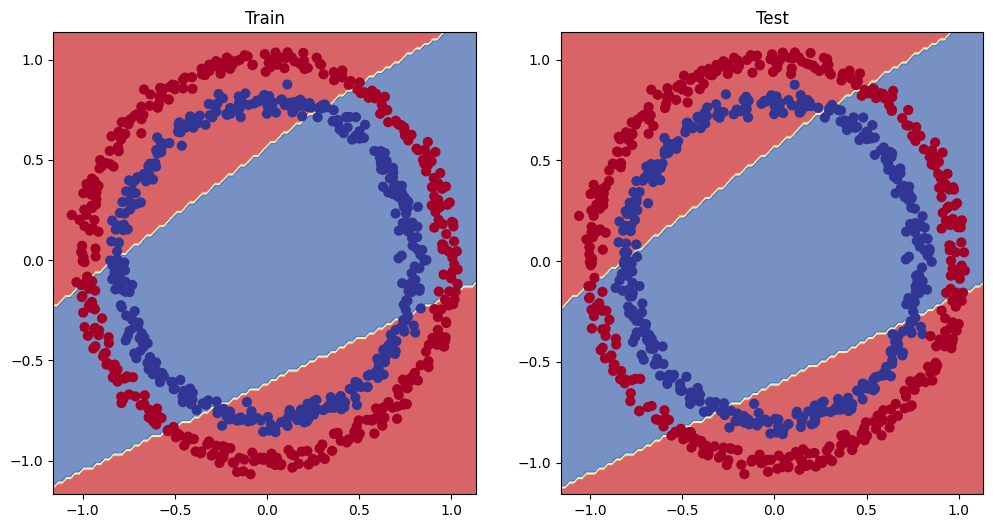

In [103]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)

#Plot the loss curves

In [104]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.695755,0.49625
1,0.693219,0.49750
2,0.691735,0.50125
3,0.690632,0.50125
4,0.689636,0.50375
5,0.688690,0.53750
6,0.687810,0.56750
7,0.687094,0.55750
8,0.686452,0.55375
9,0.685750,0.54375


Text(0.5, 1.0, 'Model_8 loss curves')

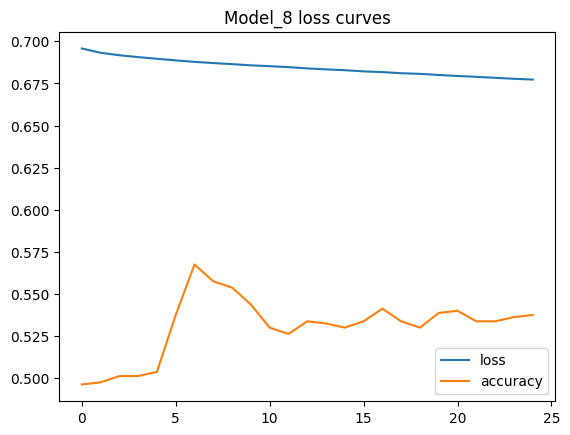

In [105]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

#Finding the best Learning rate

lr where the loss decreases the most in training


> learning rate callback  |  
> Another model  |  
> A modified loss curves plot  |




In [106]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_9.compile(loss = "binary_crossentropy",
                optimizer="Adam",
                metrics = ["accuracy"])

#create a lr callback
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_sheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7585 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7561 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7536 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7509 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7479 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7452 - accuracy: 0.5113 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

Text(0.5, 1.0, 'Learning rate vs Loss')

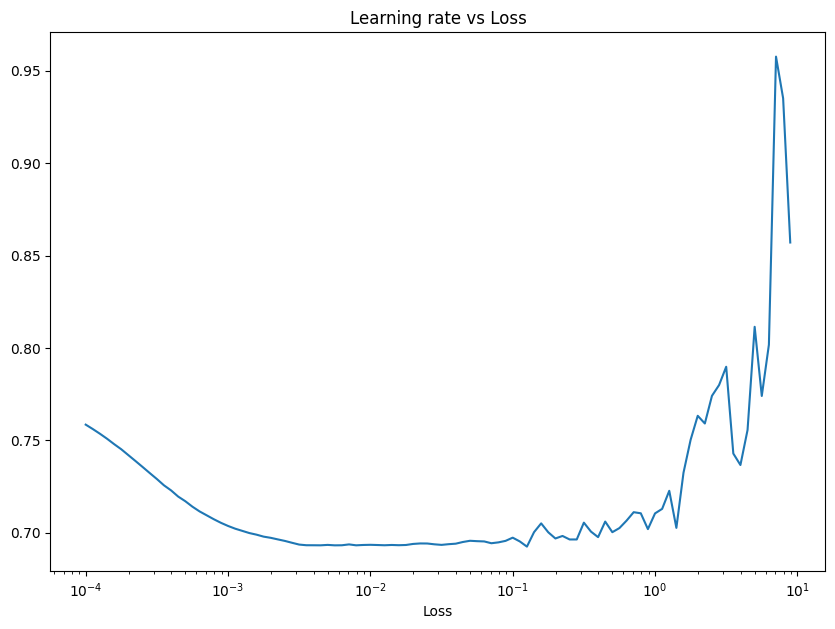

In [107]:
lrs=1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.xlabel("Loss")
plt.title("Learning rate vs Loss")

In [108]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.06 ),
                metrics=["accuracy"])

history = model_10.fit(X_train,y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 2s 6ms/step - loss: 0.7343 - accuracy: 0.5025
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.7238 - accuracy: 0.4988
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.7170 - accuracy: 0.4963
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7124 - accuracy: 0.4863
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7093 - accuracy: 0.4475
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7072 - accuracy: 0.4275
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.7050 - accuracy: 0.4300
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.7036 - accuracy: 0.4250
Epoch 9/25
25/25 [==============================] - 0s 6ms/step - loss: 0.7022 - accuracy: 0.4225
Epoch 10/25
25/25 [==============================] - 0s 10ms/step - loss: 0.7009 - accuracy: 0.4125
Epoch 11/25
25/25 

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


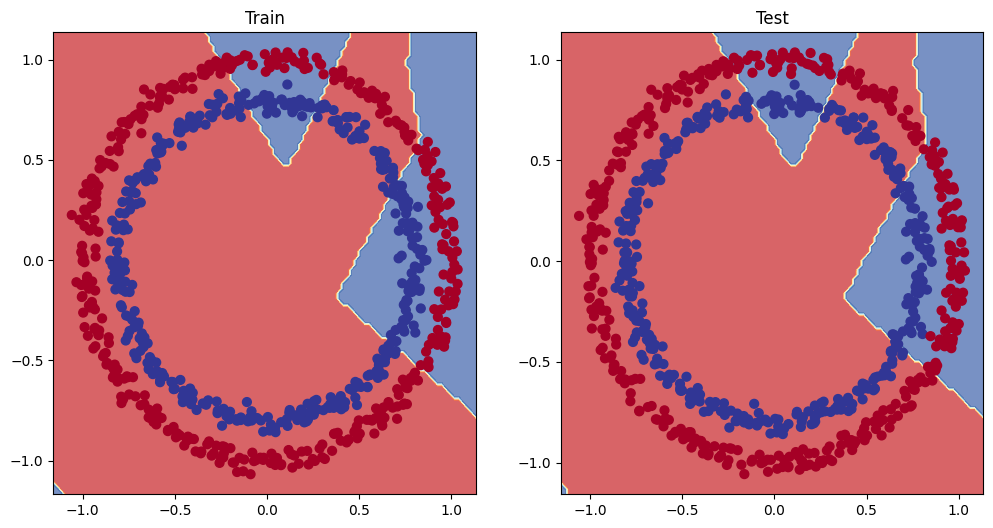

In [109]:
#plot decision boundary for training and test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

#more classoification evaluation metrics

*Accuracy

*Precision

*Recall

*F1-Score

*confusion

*Classification report from sklearn

In [110]:
model_10.evaluate(X_test,y_test)


25/25 [==============================] - 1s 5ms/step - loss: 0.6950 - accuracy: 0.4700


[0.6949809789657593, 0.4699999988079071]

In [111]:
loss,accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss : {loss}")
print(f"Model accuracy : {(accuracy*100): .2f}%")

25/25 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4700
Model loss : 0.6949809789657593
Model accuracy :  47.00%


Confusion Metrics

In [112]:
from sklearn.metrics import confusion_matrix

y_preds= model_10.predict(X_test)

confusion_matrix(y_test,y_preds)

25/25 [==============================] - 0s 3ms/step


ValueError: ignored

In [113]:
y_test[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [114]:
y_preds[:10]

array([[0.5076523 ],
       [0.5016406 ],
       [0.4888987 ],
       [0.49470165],
       [0.4888987 ],
       [0.49825433],
       [0.4888987 ],
       [0.4888987 ],
       [0.51516104],
       [0.4888987 ]], dtype=float32)

In [115]:
#conver these preds probabilities to binary

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [116]:
confusion_matrix(y_test,tf.round(y_preds))

array([[282, 122],
       [302,  94]])

###pretiffy the confusion matrics (missing)